
# Project: Medical Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset has a round 100k records about the Medical appointments in Brazil which indicate if the patients have been showed up to their appointments or not. Also, the dataset includes 14 variables to help us to get some insight and conduct our analysis to identify the reasons behind the seen of non-attended appointments. All the recorded appointments has been taken placed in one month.


### Question(s) for Analysis
> The main focus is to find out the factors that may cause the absenteeism of patients, and the following questions will help to discover some of them:
    <ul>
        <li>**Q1:** Does the interval between the appointment and scheduling date increase absenteeism? and was sending SMS effective to reduce absenteeism?</li>
        <li>**Q2:** Which group of patients(Young,Adult,Elder) has the most absenteeism? what's the characteristics of each group?</li>
    </ul>
    

In [1]:
# importing the needed packages for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> At the beginning of our analysis we need to familiarize ourselves with the data, and identify any flaws that could affect our analysis where we can then remove them to increase the quality of the data and accuracy of our analysis. some of the main problems that we are looking for:
<ul>
    <li>Missing values</li>
    <li>Wrong Data Types</li>
    <li>Duplicated rows</li>
    <li>Outliers</li>
    <li>Confusing columns' names</li>
</ul>

### General Properties
> The bellow cells will contain the steps that has been followed to discover the flaws in data:

In [2]:
# Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Having a look at the data, so we can get a general idea what we are dealing with
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# let's see the dimension of dataset
df.shape

(110527, 14)

> Based on the result, we can say that we have 110527 rows and 14 columns.

In [4]:
#Let's see a general information about the data to discover any missing data, wrong types, or confusing names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> At glance, we can confirmed that all the columns don't have any missing data. Also, comparing with the data that we saw previously we can be assured that the data types are fitting perfectly, but the only columns that need to be change are ScheduledDay and AppointmentDay to date time types, so we can execute some of useful functions on them, as well as PatientId from float to string since the id is always fixed not a calculated field. Finally, the names of the columns are meaningful, but the name of SMS_received and No-show columns are not consistent with the others so it would be better if we rename them as well as Hipertension and Handcap have a spelling mistake.

In [5]:
#let's see the uniqueness of our data to identify any outliers and hidden facts
print(df.nunique())
# check the unique values of the columns
def print_unique_values(col_name):
    print(col_name + ':' , df[col_name].unique())
print_unique_values('Scholarship')
print_unique_values('Hipertension')
print_unique_values('Diabetes')
print_unique_values('Alcoholism')
print_unique_values('Handcap')

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64
Scholarship: [0 1]
Hipertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handcap: [0 1 2 3 4]


> By checking the uniqueness of the data, we got further information such as: 
<ul>
    <li>We have 62,299 patients. </li>
    <li>The appointment date has a shocking range(less than expected), but after checking the displayed sample above the reason is understandable where the dates have been recorded without specifying the time.</li>
    <li>Most of columns have the expected uniqueness values, except Handicap which has 5 values (0-4). Based on the data dictionary this column has to be True-False, so 0-1 would be enough to illustrate this.</li>
</ul>

In [6]:
#Let's see some descriptive statistic to discover any flaws and outlier
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The statistics shows an interesting facts and some outlier, such as:
<ul>
    <li>By checking the min and max values of the age, we can see some negative value and very big value which are not realistic. we need to check further to be sure</li>
    <li>Almost 50% of the appointments didn't receive SMS reminder which may cause the absenteeism</li>
    <li>Almost 75% of the patients are not Hypertension, Diabetes, Alcoholism, Handicap, and didn't have a scholarship</li>
</ul>

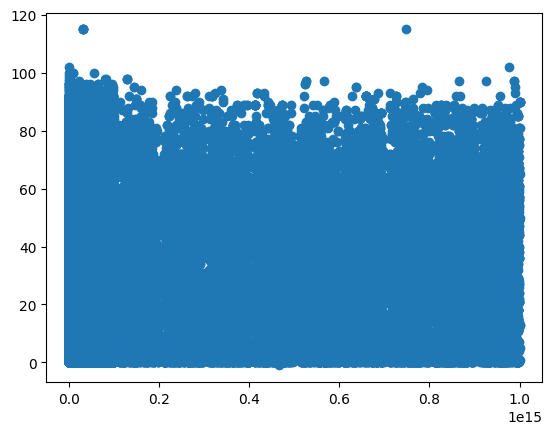

In [7]:
#confirming the outliers of the age column by using scatter plot
plt.scatter(df.PatientId, df.Age);

In [8]:
#confirming the outliers of the age column by using the statistics
patients_above_110 = df.query('Age > 110')
patients_below_0 = df.query('Age < 0')
'We have {0} patients above 110, and {1} patient bellow 0'.format(patients_above_110.PatientId.nunique(), patients_below_0.PatientId.nunique())

'We have 2 patients above 110, and 1 patient bellow 0'

> The scatter plot and statistics clearly demonstrated the outliers where we have 2 outliers above 110 years, and 1 less than 0 , our recommendation is to remove the outliers since they are few. 
>
> **Note:** we are assuming that all the patients with 0 age are babies that are new born (within months).

In [9]:
#creating an index list of dropped rows for cleaning use
dropped_patients_indx = pd.concat([patients_above_110,patients_below_0]).index

In [10]:
#Let's find any duplicated rows
df.duplicated().sum()

0

> The result shows that the dataset doesn't has any duplicated rows, but we still need to check if the data has patients who scheduled many appointments since we want to analyze the attributes of the patients that may caused the attending/missing the appointment

In [11]:
# check the duplicated rows based on patients IDs and the status of their appointment, 
# since the factors may had changed for the two status of one patient
df.duplicated(['PatientId', 'No-show']).sum()

38710

> Based on the result, we have 38710 duplicate rows that we have to remove them in order to make our analysis accurate.


### Data Cleaning
> Based on our investigation, we have to fix the following flaws as well as creating new meaningful columns which will help us to answer our questions smoothly:
<ol>
    <li> Removing the outlier of the age</li>
    <li> Removing the duplicated rows</li>
    <li> Replace Handcap values to 0 & 1</li>
    <li> Convert the PatientId, and ScheduledDay to appropriate data type</li>
    <li> Rename SMS_received, No-show columns, Hipertension, and Handcap</li>
    <li> Create new columns for the interval period between appointment and schedule dates</li>
    <li> Create new columns for patients' age group (young, adult, elder)</li>
    <li> Drop the unneeded columns for our analysis</li>
</ol>

 

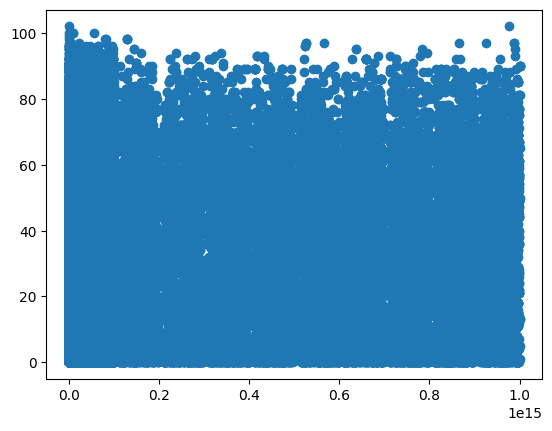

In [12]:
# remove outliers from the dataset
df.drop(dropped_patients_indx, inplace=True)
plt.scatter(df.PatientId, df.Age);

In [13]:
# remove duplicated rows
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)

In [14]:
#Replace extra Handicap values to 1, assuming that 1, 2, 3, and 4 are the levels of disability 
df['Handcap'] = df['Handcap'].map(lambda x: 1 if x>=1 else 0)

In [15]:
# Convert PatientId, AppointmentDay, and ScheduledDay to the appropriate data type
df['PatientId'] = df['PatientId'].astype(str).apply(lambda x: x.replace('.0',''))
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
# Rename SMS_received, No-show, Hipertension, and Handcap
df.rename(columns = {'SMS_received' : 'SMSReceived', 'No-show' : 'NoShow', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace = True)

In [17]:
# Create the interval column
df['Interval'] = abs(df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [18]:
# create age group column
bin_range = [0, 18, 60,110]
bin_labels = ['Young', 'Adult','Elder']
df['AgeGroup'] = pd.cut(df['Age'], bin_range, labels= bin_labels)

> In order to make the dataset much cleaner and increase the speed of reading the data we will remove the following unneeded columns:
<ul>
    <li>AppointmentID: it won't has any contribution in our analysis</li>
    <li>ScheduledDay: after getting the interval, it won't has any role in our analysis </li>
</ul>

In [19]:
# Remove AppointmentID, and ScheduledDay
df.drop(['AppointmentID', 'ScheduledDay'], axis=1, inplace= True)

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data is the time to explore it, find answers for our questions, and find out if there's any relationship between the patients' attributes and attending/missing their appointments. 

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### **Q1:** Does the period between the appointment and scheduling date increase absenteeism? and was sending SMS as a reminder effective to reduce absenteeism?

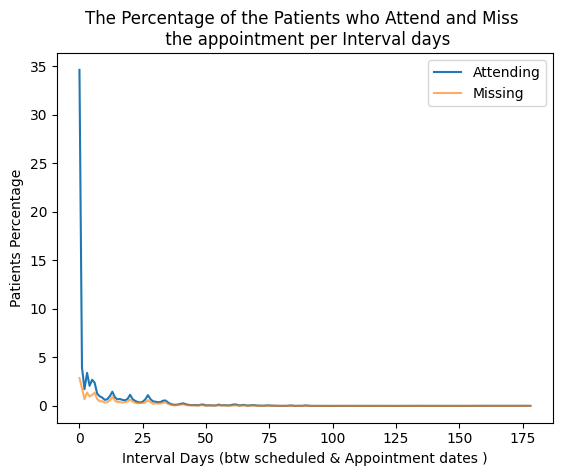

In [41]:
# find out the relationship between absenteeism rate and interval days
# split the dataset to two one for the patients who attend their appointments and the other for patients who didn't
Show_df = df.query('NoShow == "No"')
NoShow_df = df.query('NoShow == "Yes"')

# calculate the percentage of the patients who show up per interval
Show_counts_df = Show_df.groupby(['Interval'], as_index=False)['NoShow'].count()
Show_percentage_df = Show_counts_df.copy() #make a copy for calculating percentage
Show_percentage_df['NoShow'] = (Show_percentage_df['NoShow'] / df['NoShow'].count()) *100
# calculate the percentage of the patients who didn't show up per interval
NoShow_counts_df = NoShow_df.groupby(['Interval'], as_index=False)['NoShow'].count()
NoShow_percentage_df = NoShow_counts_df.copy() #make a copy for calculating percentage
NoShow_percentage_df['NoShow'] = (NoShow_percentage_df['NoShow'] / df['NoShow'].count()) *100
# visualize our findings
plt.figure(1)
plt.plot(Show_percentage_df['Interval'], Show_percentage_df['NoShow'], label = 'Attending')
plt.plot( NoShow_percentage_df['Interval'], NoShow_percentage_df['NoShow'], label = 'Missing', alpha=0.65 )
plt.title('The Percentage of the Patients who Attend and Miss \n the appointment per Interval days')
plt.xlabel('Interval Days (btw scheduled & Appointment dates )')
plt.ylabel ('Patients Percentage')
plt.legend()
plt.show();

> From the chart, we can clearly see that the patients have a high tendency to attend their appointments that scheduled at the same day by 34%, and it's dramatically decreased less than 5% if the scheduled date took a few days before appointment, but the tendency to show up is still higher than those who missed the appointments within a month. Besides, if the interval is higher than 40 days the the percentage of patients who attended and missed the appointments is the same. In conclusion, the interval between scheduled and appointment date does affect the patients who showed up which it has been reduced, but it doesn't increase number of patients who missed their appointments. 

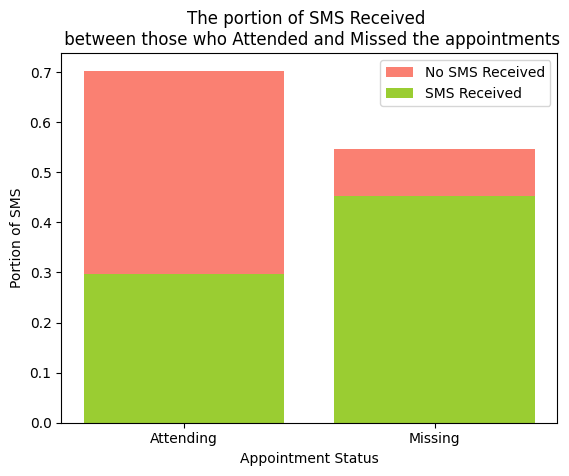

In [50]:
# check if sending SMS reduced absenteeism
# Calculating the proportions of SMS Received in each data set
Show_SMS_counts = Show_df['SMSReceived'].value_counts()
Show_total = Show_df['PatientId'].count()
Show_SMS_proportions = Show_SMS_counts / Show_total
NoShow_SMS_counts = NoShow_df['SMSReceived'].value_counts()
NoShow_total = NoShow_df['PatientId'].count()
NoShow_SMS_proportions = NoShow_SMS_counts / NoShow_total
#prepare data for visualization
No_SMS= [Show_SMS_proportions[0], NoShow_SMS_proportions[0]]
Received_SMS= [Show_SMS_proportions[1], NoShow_SMS_proportions[1]]
# visualize our finding
plt.figure(2)
plt.subplot()
plt.bar(['Attending', 'Missing'], No_SMS, color='salmon', label='No SMS Received')
plt.bar(['Attending', 'Missing'], Received_SMS, color='yellowgreen', label='SMS Received')
plt.title('The portion of SMS Received \n between those who Attended and Missed the appointments')
plt.xlabel('Appointment Status')
plt.ylabel('Portion of SMS')
plt.legend()
plt.show();

> From the chart, it's clearly that Receiving  SMS doesn't have any affect on attending/missing the appointments since 70% of the patients who attend their appointments didn't receive SMS where in the other hand 45% of the patients who missed their appointments received SMS which is higher than those who attend.

### **Q2:** Which group of patients(Young,Adult,Elder) has the highest absenteeism? what's the characteristics of each group and the difference between those who attend?

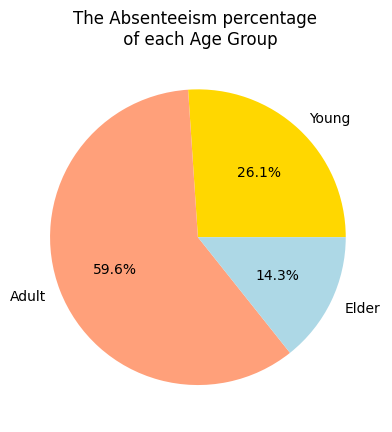

In [51]:
plt.figure(3)
colors= ['gold', 'lightsalmon', 'lightblue']
NoShow_df.groupby('AgeGroup')['NoShow'].count().plot(kind='pie', colors = colors, autopct='%.1f%%' )
plt.title('The Absenteeism percentage \n of each Age Group')
plt.ylabel('');

> From the first chart, we can determine the highest group that has a higher absenteeism is the adult with 59.6%. In contrast, the elders are more concerned about their health, so they have the lowest absenteeism percentage with 14.3%. Besides, the young group has 26.1% absenteeism percentage since their parents are more concerned about their children's health. 

C:\Users\s3319\AppData\Local\Temp\ipykernel_6872\4255151221.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NoShow_patients_attributes = NoShow_df.groupby('AgeGroup')['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap' ].sum()
C:\Users\s3319\AppData\Local\Temp\ipykernel_6872\4255151221.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Show_patients_attributes = Show_df.groupby('AgeGroup')['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap' ].sum()


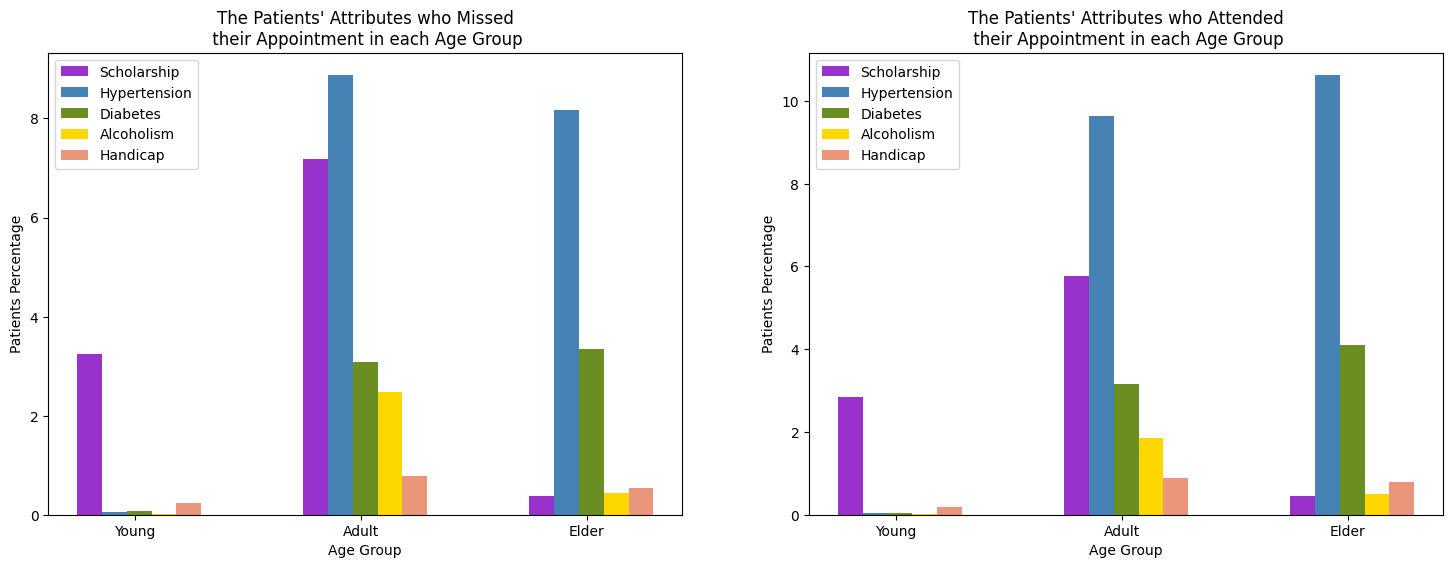

In [53]:
# calculate the number of patients in each characteristics who attend/miss appointment
NoShow_patients_attributes = NoShow_df.groupby('AgeGroup')['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap' ].sum()
Show_patients_attributes = Show_df.groupby('AgeGroup')['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap' ].sum()

# prepare the needed values to style bar plot
ind= np.arange(len(NoShow_patients_attributes['Scholarship'])) #for location of bar
width = 0.11 #width of bar

#visualize the patients' characteristics who missed appointments
plt.figure(4, figsize=(18,6))
plt.subplot(1,2,1)
NoShow_patients_sch = plt.bar(ind, NoShow_patients_attributes['Scholarship']/ NoShow_df['PatientId'].count() *100, width, color='darkorchid', label='Scholarship')
NoShow_patients_hyp =plt.bar(ind + width, NoShow_patients_attributes['Hypertension']/ NoShow_df['PatientId'].count() *100, width, color='steelblue', label='Hypertension')
NoShow_patients_dia = plt.bar((ind + (width*2)), NoShow_patients_attributes['Diabetes']/ NoShow_df['PatientId'].count() *100, width, color='olivedrab', label='Diabetes')
NoShow_patients_alc =plt.bar((ind + (width*3)), NoShow_patients_attributes['Alcoholism']/ NoShow_df['PatientId'].count() *100, width, color='gold', label='Alcoholism')
NoShow_patients_hand =plt.bar((ind + (width*4)), NoShow_patients_attributes['Handicap']/ NoShow_df['PatientId'].count() *100, width, color='darksalmon', label='Handicap')
locations = ind + 0.2   # xtick locations
labels = ['Young', 'Adult', 'Elder']  # xtick labels
plt.xticks(locations, labels)
plt.title("The Patients' Attributes who Missed\n their Appointment in each Age Group")
plt.xlabel('Age Group')
plt.ylabel('Patients Percentage')
plt.legend()

#visualize the patients' characteristics who attended appointments
plt.subplot(1,2,2)
Show_patients_sch = plt.bar(ind, Show_patients_attributes['Scholarship']/ Show_df['PatientId'].count() *100, width, color='darkorchid', label='Scholarship')
Show_patients_hyp =plt.bar(ind + width, Show_patients_attributes['Hypertension'] / Show_df['PatientId'].count() *100, width, color='steelblue', label='Hypertension')
Show_patients_dia = plt.bar((ind + (width*2)), Show_patients_attributes['Diabetes']/ Show_df['PatientId'].count() *100, width, color='olivedrab', label='Diabetes')
Show_patients_alc =plt.bar((ind + (width*3)), Show_patients_attributes['Alcoholism']/ Show_df['PatientId'].count() *100, width, color='gold', label='Alcoholism')
Show_patients_hand =plt.bar((ind + (width*4)), Show_patients_attributes['Handicap']/ Show_df['PatientId'].count() *100, width, color='darksalmon', label='Handicap')
plt.xticks(locations, labels)
plt.title("The Patients' Attributes who Attended\n their Appointment in each Age Group")
plt.xlabel('Age Group')
plt.ylabel('Patients Percentage')
plt.legend()
plt.show();


In [54]:
# showing the patients percentage in each attribute
print(NoShow_patients_attributes/ NoShow_df['PatientId'].count() *100)
print(Show_patients_attributes/ Show_df['PatientId'].count() *100)

          Scholarship  Hypertension  Diabetes  Alcoholism  Handicap
AgeGroup                                                           
Young        3.249915      0.045295  0.073604    0.022647  0.243461
Adult        7.173593      8.883479  3.091383    2.474238  0.787000
Elder        0.379345      8.164421  3.346167    0.447288  0.537878
          Scholarship  Hypertension  Diabetes  Alcoholism  Handicap
AgeGroup                                                           
Young        2.851286      0.031394  0.033240    0.018467  0.192056
Adult        5.765360      9.628631  3.148603    1.850381  0.899337
Elder        0.463519     10.633229  4.105187    0.491219  0.801463


> The second chart has illustrated interesting facts, such as:
    <ul>
        <li>The characteristics of each age group are identical between those who attended and missed the appointments. Since, 
            <ul>
                <li>The young patients' characteristics are having scholarship and handicap</li>
                <li>The adult patients' characteristics are having scholarship, hypertension, alcoholism, diabetes, and few have  handicap</li>
                <li>The elder patients' characteristics are having hypertension, diabetes, and only few have handicap, alcoholism, scholarship</li>
            </ul> </li>
        <li>Although the adult group has more patients who have scholarship, hypertension, handicap, and alcoholism, they still the highest group who didn't attend their appointments.</li>
        <li>The Elder patients who have chronic diseases(hypertension, diabetes) are more likely to attend their appointments, and less likely to miss it.</li>
        <li>In general, the patients who have handicap, hypertension, and diabetes are more likely to attend their appointments, except the young patients who missed more appointments, and the reason may that they are young, scared, don't know their interest, and hard to deal with which add pressure on their parents.</li>
        <li>Having a scholarship doesn't increase tendency to attend the appointments, since those who has a scholarship are more likely to miss the appointments.</li>   
    </ul>

<a id='conclusions'></a>
## Conclusions

> In conclusion, we found a lot of interesting facts that affect the attending or missing an appointment, such as:
    <ul>
    <li>The interval between scheduling and appointment dates doesn't increase absenteeism, but the number of patients who are willing to attend has been reduced by 30% and less.</li>
    <li> Sending SMS to the patients doesn't has any affect on attending/missing the appointments since 70% of patients who attend their appointments didn't receive any SMS while in the other side 45% of patients who missed their appointments did received the SMS</li>
    <li>The adult patients are more likely to miss their appointment despite the facts they are the most age group who are supported by a scholarship, has more chronic diseases, alcoholism, and handicap</li>
    <li>Having a scholarship, alcoholism may increase the patients tendency to miss the appointment.</li>
    <li>The adult and elder patients with chronic diseases and handicap has high tendency to attend their appointments</li>
    <li>The young patients with chronic diseases and handicap has high tendency to miss their appointments</li>
    </ul>
> To sum up, the only factor that can be included to predict the patients tendency to miss an appointment is age
#### **Limitation**: 
> the only strong factor is the age all the other attributes are matched between those who attend & not.. need to find another factors